### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [3]:
import pandas as pd
uber_data = pd.read_csv('uber-raw-data-aug14.csv')
uber_data.head()

Date/Time      Lat      Lon    Base
0  8/1/2014 0:03:00  40.7366 -73.9906  B02512
1  8/1/2014 0:09:00  40.7260 -73.9918  B02512
2  8/1/2014 0:12:00  40.7209 -74.0507  B02512
3  8/1/2014 0:12:00  40.7387 -73.9856  B02512
4  8/1/2014 0:12:00  40.7323 -74.0077  B02512

#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [5]:
# Convert the 'Date/Time' column to datetime format
uber_data['Date/Time']=pd.to_datetime(uber_data['Date/Time'])
#group by date and count the number of pickup
pickups_by_date = uber_data.groupby(uber_data['Date/Time'].dt.date).size()

# Find the date with the highest number of pickups
date_with_highest_pickups = pickups_by_date.idxmax()
highest_pickups_count = pickups_by_date.max()

print("Date with the highest number of pickups:", date_with_highest_pickups)
print("Number of pickups on the highest date:", highest_pickups_count)



Date with the highest number of pickups: 2014-08-07
Number of pickups on the highest date: 32759


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [7]:

# Filter the DataFrame to include only the rows for the date with the highest number of pickups
highest_pickups_date_data = uber_data[uber_data['Date/Time'].dt.date == date_with_highest_pickups]

# Get the count of pickups on the highest date
count_of_pickups_on_highest_date = highest_pickups_date_data.shape[0]

print("Count of pickups on the highest date:", count_of_pickups_on_highest_date)




Count of pickups on the highest date: 32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [9]:


# Count the number of unique TLC base companies
unique_tlc_base_companies = uber_data['Base'].nunique()

print("Number of unique TLC base companies:", unique_tlc_base_companies)



Number of unique TLC base companies: 5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [10]:
# Group by TLC base company and count the number of pickups
pickups_by_base_company = uber_data.groupby('Base').size()

# Find the TLC base company with the highest number of pickups
tlc_base_with_highest_pickups = pickups_by_base_company.idxmax()
highest_pickups_count_by_base = pickups_by_base_company.max()

print("TLC base company with the highest number of pickups:", tlc_base_with_highest_pickups)
print("Number of pickups for the TLC base company with the highest pickups:", highest_pickups_count_by_base)


TLC base company with the highest number of pickups: B02617
Number of pickups for the TLC base company with the highest pickups: 355803


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [11]:
# Group by TLC base company and count the number of pickups
pickups_by_base_company = uber_data.groupby('Base').size()

# Display the counts of pickups by TLC base company
print(pickups_by_base_company)



Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [14]:
# Extract the hour from the 'Date/Time' column
uber_data['Hour'] = uber_data['Date/Time'].dt.hour

# Group by hour and count the number of pickups
pickups_by_hour = uber_data.groupby('Hour').size()

# Find the hour with the highest number of pickups
hour_with_highest_pickups = pickups_by_hour.idxmax()
highest_pickups_count_by_hour = pickups_by_hour.max()

print("Hour with the highest number of pickups:", hour_with_highest_pickups)
print("Number of pickups for the hour with the highest pickups:", highest_pickups_count_by_hour)


Hour with the highest number of pickups: 17
Number of pickups for the hour with the highest pickups: 57122


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

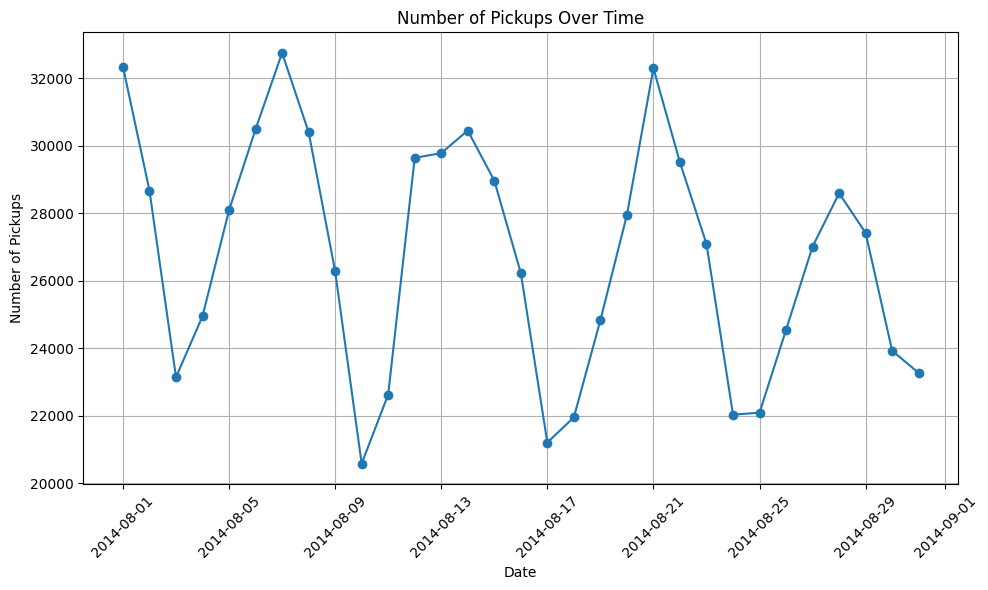

In [15]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
pickups_by_date = uber_data.groupby(uber_data['Date/Time'].dt.date).size()

# Create a line plot to visualize the number of pickups over time
plt.figure(figsize=(10,6))
plt.plot(pickups_by_date.index, pickups_by_date.values, marker='o', linestyle='-')
plt.title('Number of Pickups Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

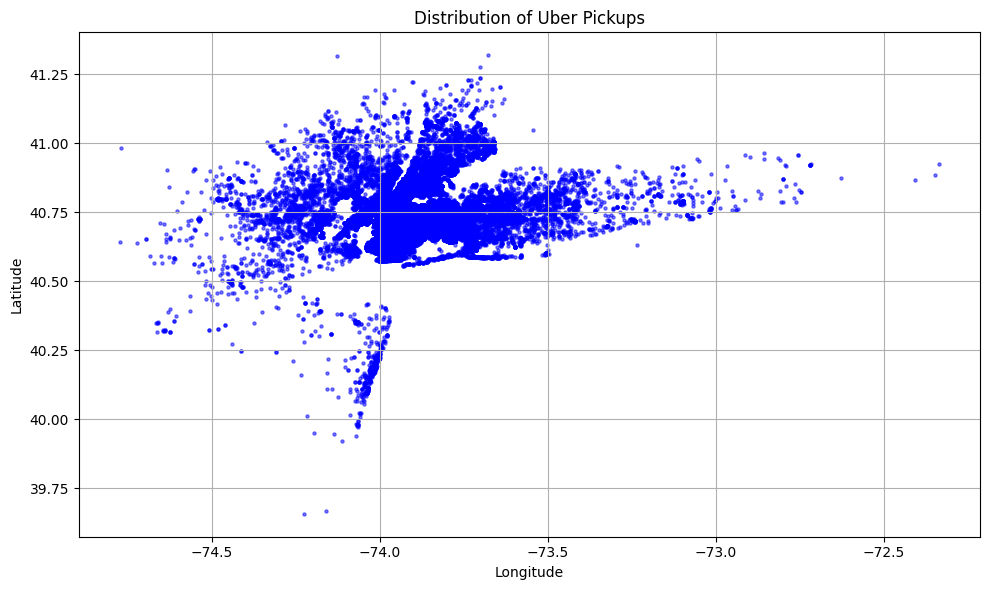

In [16]:
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize=(10,6))
plt.scatter(uber_data['Lon'], uber_data['Lat'], s=5, alpha=0.5, color='blue')
plt.title('Distribution of Uber Pickups')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

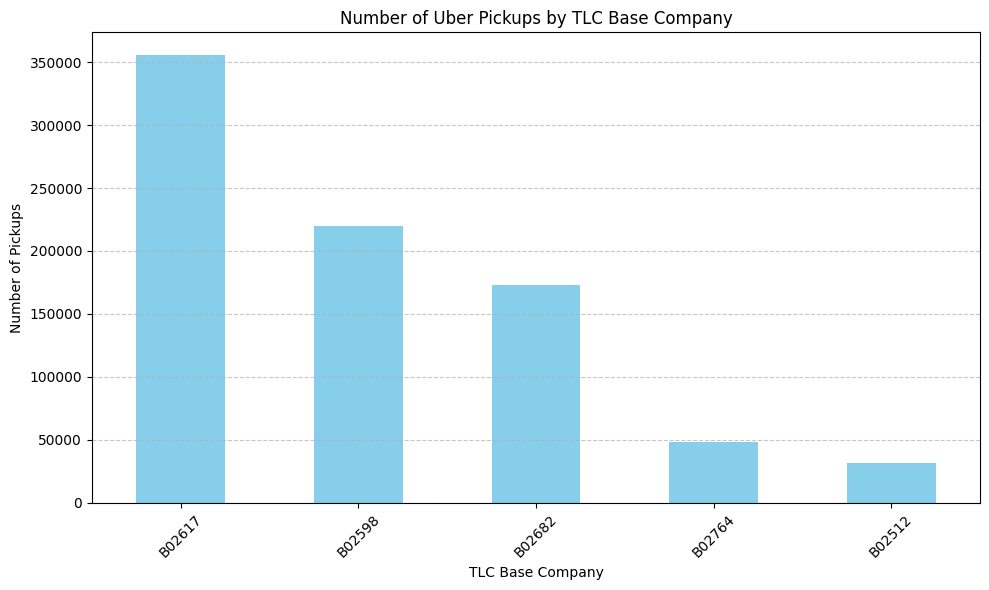

In [17]:
import matplotlib.pyplot as plt

# Group by TLC base company and count the number of pickups
pickups_by_base_company = uber_data['Base'].value_counts()

# Create a bar chart to compare the number of Uber pickups for each TLC base company
plt.figure(figsize=(10,6))
pickups_by_base_company.plot(kind='bar', color='skyblue')
plt.title('Number of Uber Pickups by TLC Base Company')
plt.xlabel('TLC Base Company')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

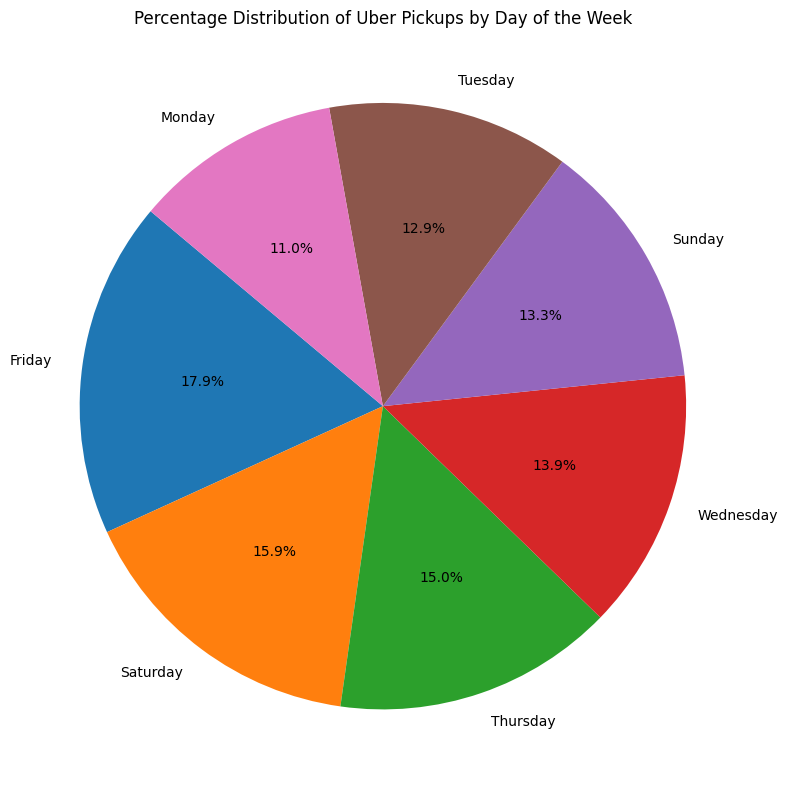

In [18]:
import matplotlib.pyplot as plt

# Group by day of the week and count the number of pickups
pickups_by_day_of_week = uber_data['Date/Time'].dt.day_name().value_counts()

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.figure(figsize=(8, 8))
plt.pie(pickups_by_day_of_week, labels=pickups_by_day_of_week.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Uber Pickups by Day of the Week')
plt.axis('equal')
plt.tight_layout()
plt.show()
